
*   Laboratorio 4 - Sistemas Distribuidos y Paralelos
*   Autor: John Serrano Carrasco


<h1> Kafka y Zookeeper </h1>

In [ ]:
!pip install kafka-python==2.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 kB 1.9 MB/s eta 0:00:00


In [ ]:
!curl -sSOL https://downloads.apache.org/kafka/3.6.1/kafka_2.12-3.6.1.tgz

In [ ]:
!tar -xzf kafka_2.12-3.6.1.tgz

In [ ]:
ls ./kafka_2.12-3.6.1/config/

connect-console-sink.properties    connect-mirror-maker.properties  server.properties
connect-console-source.properties  connect-standalone.properties    tools-log4j.properties
connect-distributed.properties     consumer.properties              trogdor.conf
connect-file-sink.properties       kraft/                           zookeeper.properties
connect-file-source.properties     log4j.properties
connect-log4j.properties           producer.properties


In [ ]:
ls ./kafka_2.12-3.6.1/bin/

connect-distributed.sh*        kafka-dump-log.sh*              kafka-server-start.sh*
connect-mirror-maker.sh*       kafka-e2e-latency.sh*           kafka-server-stop.sh*
connect-plugin-path.sh*        kafka-features.sh*              kafka-storage.sh*
connect-standalone.sh*         kafka-get-offsets.sh*           kafka-streams-application-reset.sh*
kafka-acls.sh*                 kafka-jmx.sh*                   kafka-topics.sh*
kafka-broker-api-versions.sh*  kafka-leader-election.sh*       kafka-transactions.sh*
kafka-cluster.sh*              kafka-log-dirs.sh*              kafka-verifiable-consumer.sh*
kafka-configs.sh*              kafka-metadata-quorum.sh*       kafka-verifiable-producer.sh*
kafka-console-consumer.sh*     kafka-metadata-shell.sh*        trogdor.sh*
kafka-console-producer.sh*     kafka-mirror-maker.sh*          windows/
kafka-consumer-groups.sh*      kafka-producer-perf-test.sh*    zookeeper-security-migration.sh*
kafka-consumer-perf-test.sh*   kafka-reassign-partitio

In [ ]:
!./kafka_2.12-3.6.1/bin/zookeeper-server-start.sh -daemon ./kafka_2.12-3.6.1/config/zookeeper.properties
!./kafka_2.12-3.6.1/bin/kafka-server-start.sh -daemon ./kafka_2.12-3.6.1/config/server.properties
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [ ]:
!ps -ef | grep kafka

root        1405     209  0 23:55 ?        00:00:00 /bin/bash -c ps -ef | grep kafka
root        1407    1405  0 23:55 ?        00:00:00 grep kafka


<h1>Creación de Tópicos de Kafka</h1>

In [ ]:
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce0
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce1
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce2
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce3
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce4
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce5
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce6
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce7
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce8
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce9
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce10
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce11
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce12
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce13
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce14
!./kafka_2.12-3.6.1/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic ce15

Created topic ce0.
Created topic ce1.
Created topic ce2.
Created topic ce3.
Created topic ce4.
Created topic ce5.
Created topic ce6.
Created topic ce7.
Created topic ce8.
Created topic ce9.
Created topic ce10.
Created topic ce11.
Created topic ce12.
Created topic ce13.
Created topic ce14.
Created topic ce15.


<h1>Lectura del Archivo (Desde Google Drive) </h1>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
headers = ["u", "v", "w", "re", "im", "we", "freq", "ce" ]

hltau = pd.read_csv('drive/MyDrive/hltau_completo_uv.csv', header=None, names=headers)
hltau

Mounted at /content/drive


,u,v,w,re,im,we,freq,ce
0,-2245.512935,-625.275579,-404.967700,0.019848,-0.009888,12065070.0,2.247500e+11,0
1,-2245.512935,-625.275579,-404.967700,-0.000239,-0.023323,12001271.0,2.247500e+11,0
2,-2245.512935,-625.275579,-404.967700,0.005969,-0.014794,12065070.0,2.242500e+11,1
3,-2245.512935,-625.275579,-404.967700,-0.003359,-0.009349,12001271.0,2.242500e+11,1
4,-2245.512935,-625.275579,-404.967700,-0.011006,-0.024791,12065070.0,2.237500e+11,2
...,...,...,...,...,...,...,...,...
3196371,-49.627602,28.421167,68.651999,0.811038,0.068833,11467541.0,2.417500e+11,13
3196372,-49.627602,28.421167,68.651999,0.764876,0.124828,11166644.0,2.422500e+11,14
3196373,-49.627602,28.421167,68.651999,0.784313,0.060222,11467541.0,2.422500e+11,14
3196374,-49.627602,28.421167,68.651999,0.767079,0.140298,11166644.0,2.427500e+11,15


In [ ]:
from kafka import KafkaProducer
from json import dumps

<h1>Envio de las visibilidades a los tópicos de Kafka</h1>

In [ ]:
def write_to_kafka(topic_name, dict_items):
  count = 0
  producer = KafkaProducer(bootstrap_servers=['127.0.0.1:9092'])
  for key, data in dict_items.items():
    for line in data:
      # Se envia una llave, correspondiente al canal y el valor, correspondiente a la linea
      producer.send(topic_name, key=str(key).encode('utf-8'), value=(','.join(map(str, line))).encode('utf-8'))
      count += 1
  producer.flush()
  print("Wrote {0} messages into topic: {1}".format(count, topic_name))

hltau_dict = {}
# Se divide la información de acuerdo a los 16 canales espectrales
for i in range(16):
  hltau_dict[i] = hltau[hltau.iloc[:, -1] == i].to_numpy()

# Itera sobre el diccionario y envía los datos a los tópicos correspondientes
for key, data in hltau_dict.items():
  topic_name = f'ce{key}'
  write_to_kafka(topic_name, {key: data})

Wrote 210718 messages into topic: ce0
Wrote 210718 messages into topic: ce1
Wrote 210718 messages into topic: ce2
Wrote 210718 messages into topic: ce3
Wrote 210718 messages into topic: ce4
Wrote 210718 messages into topic: ce5
Wrote 210718 messages into topic: ce6
Wrote 210718 messages into topic: ce7
Wrote 183890 messages into topic: ce8
Wrote 183890 messages into topic: ce9
Wrote 183890 messages into topic: ce10
Wrote 183890 messages into topic: ce11
Wrote 193768 messages into topic: ce12
Wrote 193768 messages into topic: ce13
Wrote 193768 messages into topic: ce14
Wrote 193768 messages into topic: ce15


Se comprueba el envio correcto de las visibilidades al tópico 1

In [ ]:
! /content/kafka_2.12-3.6.1/bin/kafka-console-consumer.sh \
--bootstrap-server localhost:9092 \
--topic ce1 \
--from-beginning

Se truncaron las últimas líneas 5000 del resultado de transmisión.
-3211.229394,-2559.002742,29.49957,-0.004402,0.010246,14760355.0,224250003456.0,1.0
-9707.079006,-3094.154993,3536.011314,0.005911,-0.00255,7446915.0,224250003456.0,1.0
-9707.079006,-3094.154993,3536.011314,-0.011372,0.015255,6870824.0,224250003456.0,1.0
-4290.696374,-3633.380544,-294.71622,0.016878,-0.006772,13113454.0,224250003456.0,1.0
-4290.696374,-3633.380544,-294.71622,-0.018723,-0.002027,14749828.0,224250003456.0,1.0
-3093.572967,-2577.438795,-79.477014,-0.003193,0.005811,13779642.0,224250003456.0,1.0
-3093.572967,-2577.438795,-79.477014,0.001337,0.016381,15297192.0,224250003456.0,1.0
-2033.991044,-2182.793576,-538.749236,-0.019774,-0.000975,14518312.0,224250003456.0,1.0
-2033.991044,-2182.793576,-538.749236,-0.01169,-0.024604,15620338.0,224250003456.0,1.0
-2438.312702,-2708.429452,-712.634666,0.012012,0.013754,13890268.0,224250003456.0,1.0
-2438.312702,-2708.429452,-712.634666,-0.008888,-0.006439,15394305.0,2242

<h1>Spark</h1>

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar -xvf spark-3.5.0-bin-hadoop3.tgz
!pip install findspark

--2023-12-21 00:06:19--  https://downloads.apache.org/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.214.104, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 400395283 (382M) [application/x-gzip]
Saving to: ‘spark-3.5.0-bin-hadoop3.tgz’

spark-3.5.0-bin-had 100%[===================>] 381.85M  31.5MB/s    in 13s     

2023-12-21 00:06:32 (29.8 MB/s) - ‘spark-3.5.0-bin-hadoop3.tgz’ saved [400395283/400395283]

spark-3.5.0-bin-hadoop3/
spark-3.5.0-bin-hadoop3/kubernetes/
spark-3.5.0-bin-hadoop3/kubernetes/tests/
spark-3.5.0-bin-hadoop3/kubernetes/tests/pyfiles.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/decommissioning.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/autoscale.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/python_executable_check.py
spark-3.5.0-bin-hadoop3/kubernetes/tests/worker_mem

In [ ]:
!curl -fL https://github.com/coursier/coursier/releases/latest/download/cs-x86_64-pc-linux.gz | gzip -d > cs && chmod +x cs && ./cs setup -y

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 19.8M  100 19.8M    0     0  13.7M      0  0:00:01  0:00:01 --:--:-- 15.5M
Checking if a JVM is installed
Found a JVM installed under /usr/lib/jvm/java-11-openjdk-amd64.

Checking if ~/.local/share/coursier/bin is in PATH
Should we add ~/.local/share/coursier/bin to your PATH via ~/.profile? [Y/n] Y

Checking if the standard Scala applications are installed
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 XML files, 1 POM files
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 XML files
 [#         ]   Downloaded 1 POM files
 [#         ]   Downloaded 1 POM files
 [#         ]   Downloaded 1 POM f

In [ ]:
import os
os.environ['PATH'] += ":/root/.local/share/coursier/bin"

In [ ]:
!scala -version

Scala code runner version 3.3.1 -- Copyright 2002-2023, LAMP/EPFL


In [ ]:
!cs install scala:2.12.18 && cs install scalac:2.12.18

https://repo1.maven.org/maven2/org/scala-lang/scala-compiler/2.12.18/scala-comp…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-compiler/2.12.18/scala-comp…
  100.0% [##########] 2.4 KiB (56.2 KiB / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.12.18/scala-libra…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-reflect/2.12.18/scala-refle…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/modules/scala-xml_2.12/2.1.0/scal…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.12.18/scala-libra…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-reflect/2.12.18/scala-refle…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/modules/scala-xml_2.12/2.1.0/scal…
    0.0% [          ] 0B (0B / s)
https://repo1.maven.org/maven2/org/scala-lang/scala-library/2.12.18/s

In [ ]:
!scala -version

Scala code runner version 2.12.18 -- Copyright 2002-2023, LAMP/EPFL and Lightbend, Inc.


In [ ]:
!wget "https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10-assembly_2.12/3.5.0/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar"

--2023-12-21 00:07:48--  https://repo1.maven.org/maven2/org/apache/spark/spark-streaming-kafka-0-10-assembly_2.12/3.5.0/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar
Resolving repo1.maven.org (repo1.maven.org)... 199.232.192.209, 199.232.196.209, 2a04:4e42:4c::209, ...
Connecting to repo1.maven.org (repo1.maven.org)|199.232.192.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5284417 (5.0M) [application/java-archive]
Saving to: ‘spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar’

spark-streaming-kaf 100%[===================>]   5.04M  --.-KB/s    in 0.02s   

2023-12-21 00:07:48 (220 MB/s) - ‘spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar’ saved [5284417/5284417]



In [ ]:
!ls

cs		  kafka_2.12-3.6.1.tgz	   spark-3.5.0-bin-hadoop3.tgz
drive		  sample_data		   spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar
kafka_2.12-3.6.1  spark-3.5.0-bin-hadoop3


In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"
os.environ['PYSPARK_SUBMIT_ARGS'] = '--jars /content/spark-streaming-kafka-0-10-assembly_2.12-3.5.0.jar pyspark-shell'

In [ ]:
import findspark
findspark.init()

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.ml.feature import Normalizer, StandardScaler
import random
import pyspark
import sys
from pyspark import SparkContext, SparkConf
from pyspark.streaming import StreamingContext
from uuid import uuid1
import time

In [ ]:
scala_version = '2.12'
spark_version = '3.5.0'
# TODO: Ensure match above values match the correct versions
packages = [
    f'org.apache.spark:spark-sql-kafka-0-10_{scala_version}:{spark_version}',
    'org.apache.kafka:kafka-clients:3.6.1'
]
spark = SparkSession.builder\
   .master("local")\
   .appName("kafka-example")\
   .config("spark.jars.packages", ",".join(packages))\
   .getOrCreate()

In [ ]:
spark.sparkContext.setLogLevel("WARN")

In [ ]:
def readFromKafka(spark, topics):
  return spark.readStream \
  .format("kafka") \
  .option("kafka.bootstrap.servers", "localhost:9092") \
  .option("subscribe", topics) \
  .option("startingOffsets", "earliest") \
  .option("failOnDataLoss", False) \
  .option("includeTimestamp", "true") \
  .load()

In [ ]:
from pyspark.sql.types import DoubleType, IntegerType, StringType, StructType, StructField, BinaryType
from pyspark.sql.functions import expr, from_json, round

  <h1> Se obtiene la data desde Kafka y se realiza el proceso de gridding </h1>

In [ ]:
topics = "ce0,ce1,ce2,ce3,ce4,ce5,ce6,ce7,ce8,ce9,ce10,ce11,ce12,ce13,ce14,ce15"
query_df = readFromKafka(spark, topics)

query_df = query_df.selectExpr(
          "split(value, ',') as data",
          "CAST(data[0] AS DOUBLE) AS u",
          "CAST(data[1] AS DOUBLE) AS v",
          "CAST(data[2] AS DOUBLE) AS w",
          "CAST(data[3] AS DOUBLE) AS re",
          "CAST(data[4] AS DOUBLE) AS im",
          "CAST(data[5] AS DOUBLE) AS we",
          "CAST(data[6] AS DOUBLE) AS freq",
          "CAST(data[7] AS INT) AS ce",
          "DOUBLE((3.14159265359 / (3600 * 180)) * 0.003) AS dx",
          "DOUBLE(1/(2048 * dx)) AS du",
          "DOUBLE(u * (freq / 299792458)) AS u_k",
          "DOUBLE(v * (freq / 299792458)) AS v_k",
          "ROUND(u_k / du) + (2048 / 2) AS i_k",
          "ROUND(v_k / du) + (2048 / 2) AS j_k",
          "INT(i_k * 2048 + j_k) AS index",
          "(re * we) AS rewe",
          "(im * we) AS imwe",
          "current_timestamp() AS timestamp") \
          .withWatermark("timestamp", "0 minutes") \
          .groupBy("index", "timestamp").agg(
              sum("rewe").alias("real"),
              sum("imwe").alias("imaginario"),
              sum("we").alias("peso")) \
              .selectExpr("index", "DOUBLE(real / peso) as real_final", "DOUBLE(imaginario / peso) as imaginario_final")


In [ ]:
query_df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- real_final: double (nullable = true)
 |-- imaginario_final: double (nullable = true)



In [ ]:
# Esto se usa solo si utilizamos scripts en distintas instancias (terminales) de una maquina
#query = query_df.selectExpr("CAST(key AS STRING)", "CAST(value AS STRING)") \
#    .writeStream \
#    .queryName('test_query') \
#    .format("console") \
#    .outputMode("append")  \
#    .option("truncate", "False")  \
#    .trigger(processingTime="10 seconds") \
#    .start()

#query.awaitTermination()

Escritura del dataframe final a múltiples .csv

In [ ]:
# Esto se usa si usamos jupyter notebook
print("Writing in .csv files...")
query = query_df.writeStream \
    .queryName("test_query0") \
    .outputMode("append") \
    .format("csv") \
    .option("path", "salida/") \
    .option("checkpointLocation", "checkpoint/")\
    .start() \
    .awaitTermination() # Cuando se creen los 200 .csv en salida/, se debe detener el bloque.


Writing in .csv files...


ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/content/spark-3.5.0-bin-hadoop3/python/lib/py4j-0.10.9.7-src.zip/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: ignored

<h1>Escritura del .csv final "results.csv"</h1>

In [ ]:
# Especifica el nombre del directorio de salida
directorio_salida = "salida/results"

# Use PySpark para leer todos los archivos "part"
allfiles = spark.read.option("header", "false").csv("salida/part-*.csv")

# Guarda el DataFrame en un archivo CSV en el directorio de salida
allfiles.coalesce(1).write.format("csv").option("header", "false").mode("overwrite").save(directorio_salida)

# Obtiene la lista de archivos en el directorio de salida con extensión .csv
archivos_csv_en_directorio = [archivo for archivo in os.listdir(directorio_salida) if archivo.endswith(".csv")]

# Verifica si hay un solo archivo y renómbralo según tus necesidades
if len(archivos_csv_en_directorio) == 1:
  print("Creating final .csv...")
  nuevo_nombre = "results.csv"
  viejo_nombre = archivos_csv_en_directorio[0]
  os.rename(os.path.join(directorio_salida, viejo_nombre), os.path.join(directorio_salida, nuevo_nombre))
  print("Final .csv", nuevo_nombre, "created.")
else:
  print("Error: Only one CSV expected in output path.")



Creating final .csv...
Final .csv results.csv created.


Ahora con el .csv creado, se puede crear el arreglo complejo y obtener las imágenes.
Esto se realiza en el archivo "IFFT.py".

In [ ]:
# Esto ya no se usa, pero lo dejo acá igual para que se vea el dataframe creado
display(spark.sql("SELECT * FROM test_query0").show())

+-------+--------------------+--------------------+
|  index|          real_final|    imaginario_final|
+-------+--------------------+--------------------+
|1887141|-0.01265890818666...|-0.00924524379245...|
|2196338|3.676296551008025...|0.009441124728114189|
|2139085|-0.00362218458893...|0.008332148261280451|
|1901503|-0.00370109705260...|-0.00452962315798...|
|2270177|-0.00531867451533...|0.003360287296162...|
|2028519|-2.83019424146348...|-0.00189117124537...|
|1703061|-0.00163194878825...|0.006592565090411156|
|1897360|-0.00617460618330...|-0.00675364546116...|
|1911706|0.005415066456593935|2.809804669149382...|
|2014285|0.001925496640213...|-0.00149761096256...|
|2173926|0.017504426099080317|0.012446625298633645|
|1960910|-5.02533580802848...|-0.00144426460073...|
|2614207|-0.00217815650934...|-0.01100037251533925|
|1811504|-0.00107870281288...|-0.00238637888319...|
|2237351|0.005019198559690974|2.790926179620460...|
|2020262|-0.00396786952958...|0.006265673213940394|
|1872819|-0.

None

<h1> Imágen resultante tras aplicar el archivo IFFT.py con results.csv. </h1>

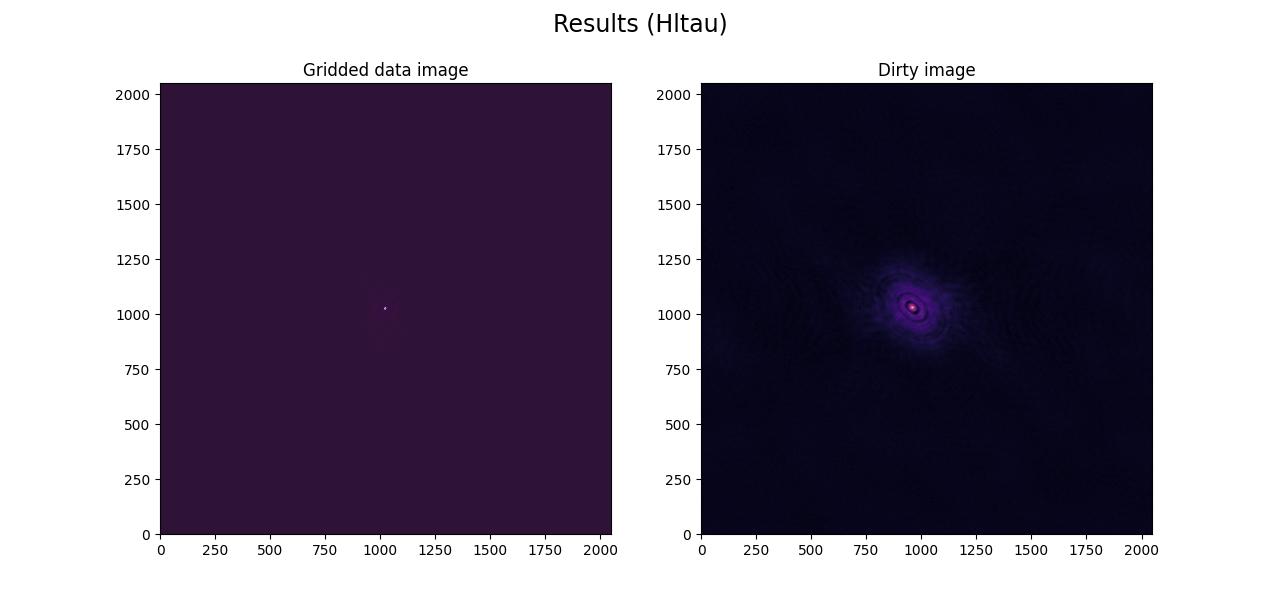